In [1]:
import pickle as pkl
import pandas as pd
data_root = '/home/rodriguez/Documents/my_codes/trajectory'
df = pkl.load(open(data_root + '/master_08052022.pkl', 'rb'))
df = df.sample(n=500, random_state=42)

In [2]:
import numpy as np
import pandas as pd

def process_trajectories(df):
    def process_single_trajectory(traj):
        # Convert the list of lists to a numpy array and transpose it
        return np.array(traj).T

    # Apply the process_single_trajectory function to each row
    trajectories = df['traj'].apply(process_single_trajectory).tolist()
    
    return trajectories

# Assuming you have your DataFrame 'df'
trajectories = process_trajectories(df)

# Print the first few trajectories to verify
# print(trajectories[:5])

In [3]:
from trajectory_cluster import cluster_trajectories
# Cluster the trajectories
num_c = 6
# Using K-means
clusters_kmeans = cluster_trajectories(trajectories, method='kmeans', n_clusters=6)

print("Cluster assignments:", clusters_kmeans)

Cluster assignments: [2 4 0 0 1 4 4 2 1 1 1 3 1 1 0 3 1 2 3 5 0 5 3 1 3 5 1 1 5 4 2 4 5 5 4 2 2
 2 3 2 1 1 3 3 2 4 1 1 3 3 1 0 3 3 3 1 0 3 3 3 5 0 4 4 5 3 3 1 2 4 5 5 1 4
 1 2 5 4 5 0 2 1 1 2 1 1 3 3 2 0 1 3 4 1 2 0 1 0 4 4 1 2 5 4 5 4 3 3 1 4 2
 4 4 4 5 1 4 1 4 5 2 0 5 0 5 1 1 1 4 0 1 4 1 4 1 4 1 1 4 2 5 0 2 2 0 4 5 3
 0 0 0 0 5 1 0 5 4 4 4 5 5 2 5 3 0 5 3 3 2 5 1 1 5 3 5 1 4 3 2 1 0 0 1 1 0
 5 5 4 4 1 4 0 3 5 4 3 1 2 5 1 4 5 5 3 2 2 4 3 3 2 0 3 5 1 5 1 2 1 1 1 0 4
 1 4 5 0 2 4 5 4 5 3 4 4 1 5 4 3 3 0 3 4 4 5 3 3 2 5 1 2 2 1 2 2 3 4 0 0 0
 4 0 2 1 1 0 1 3 1 0 2 5 3 0 4 0 0 0 2 4 4 3 2 2 1 3 1 5 4 4 0 5 5 3 3 2 1
 1 5 2 2 3 3 2 2 4 2 5 2 0 5 4 1 4 3 2 3 2 4 2 0 5 3 3 2 5 3 2 4 5 5 4 3 3
 5 0 2 0 2 3 1 2 4 3 3 3 3 2 3 3 0 5 4 5 5 3 2 0 1 4 0 3 1 2 5 4 1 1 5 1 0
 5 4 2 3 3 4 3 1 1 3 5 1 5 1 2 1 5 2 5 2 0 3 1 4 4 5 5 4 1 2 1 2 3 5 0 4 3
 4 0 5 1 5 1 1 3 4 1 2 3 2 2 3 0 4 4 4 3 5 2 1 2 2 2 1 2 5 3 1 1 2 1 2 5 4
 4 4 0 4 5 0 5 1 5 3 0 2 2 0 4 4 3 1 5 0 3 0 4 1 4 3 4 2 3 2 1 3 3 1 2 3 5
 5 1

In [4]:
df['SC_clusters'] = clusters_kmeans

In [5]:
df.head()

,name,date,quantity,exposure,tracked_id,traj,VCL,VAP,VSL,LIN,STR,WOB,BeatCross,ALH,img,cluster,SC_clusters
6422,berthrand,01102021-25,10n,0.0,40.0,"[[455, 454, 454, 453, 453, 452, 452, 451, 452,...",83.54280,33.279880,22.294040,0.266858,0.669895,0.398357,43.269230,2.9083083,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2
10747,emperador,26082021-144,100n,30.0,95.0,"[[582, 584, 579, 583, 579, 581, 580, 577, 579,...",203.32178,90.797516,77.330710,0.380337,0.851683,0.446571,29.142857,5.675195,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,4
6231,berthrand,01102021-23,10n,0.0,163.0,"[[506, 509, 510, 509, 508, 509, 510, 509, 510,...",91.31525,32.573036,12.325650,0.134979,0.378400,0.356710,46.788990,3.346689,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3,0
6352,berthrand,01102021-24,10n,0.0,121.0,"[[303, 303, 303, 305, 308, 304, 307, 307, 305,...",92.53409,30.680305,15.039619,0.162531,0.490204,0.331557,42.857143,3.1250703,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0
16233,loki,01062021-24,10n,0.0,272.0,"[[407, 407, 407, 407, 407, 406, 407, 406, 407,...",72.22397,31.853205,19.275414,0.266884,0.605133,0.441034,40.740740,2.998568,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,1


In [6]:
num_c=6

In [12]:
#df['traj'] = df['traj'].astype(str).apply(convert_to_list_of_lists)
df['traj'] = df['traj'].apply(lambda x: np.array(x))
df['centered_traj'] = df['traj'].apply(lambda x: np.array([sub_array - sub_array.mean() for sub_array in x]))
i_traj = df["centered_traj"].values
c_traj = [element.transpose().tolist() for element in i_traj]
df["centered_traj"] = c_traj

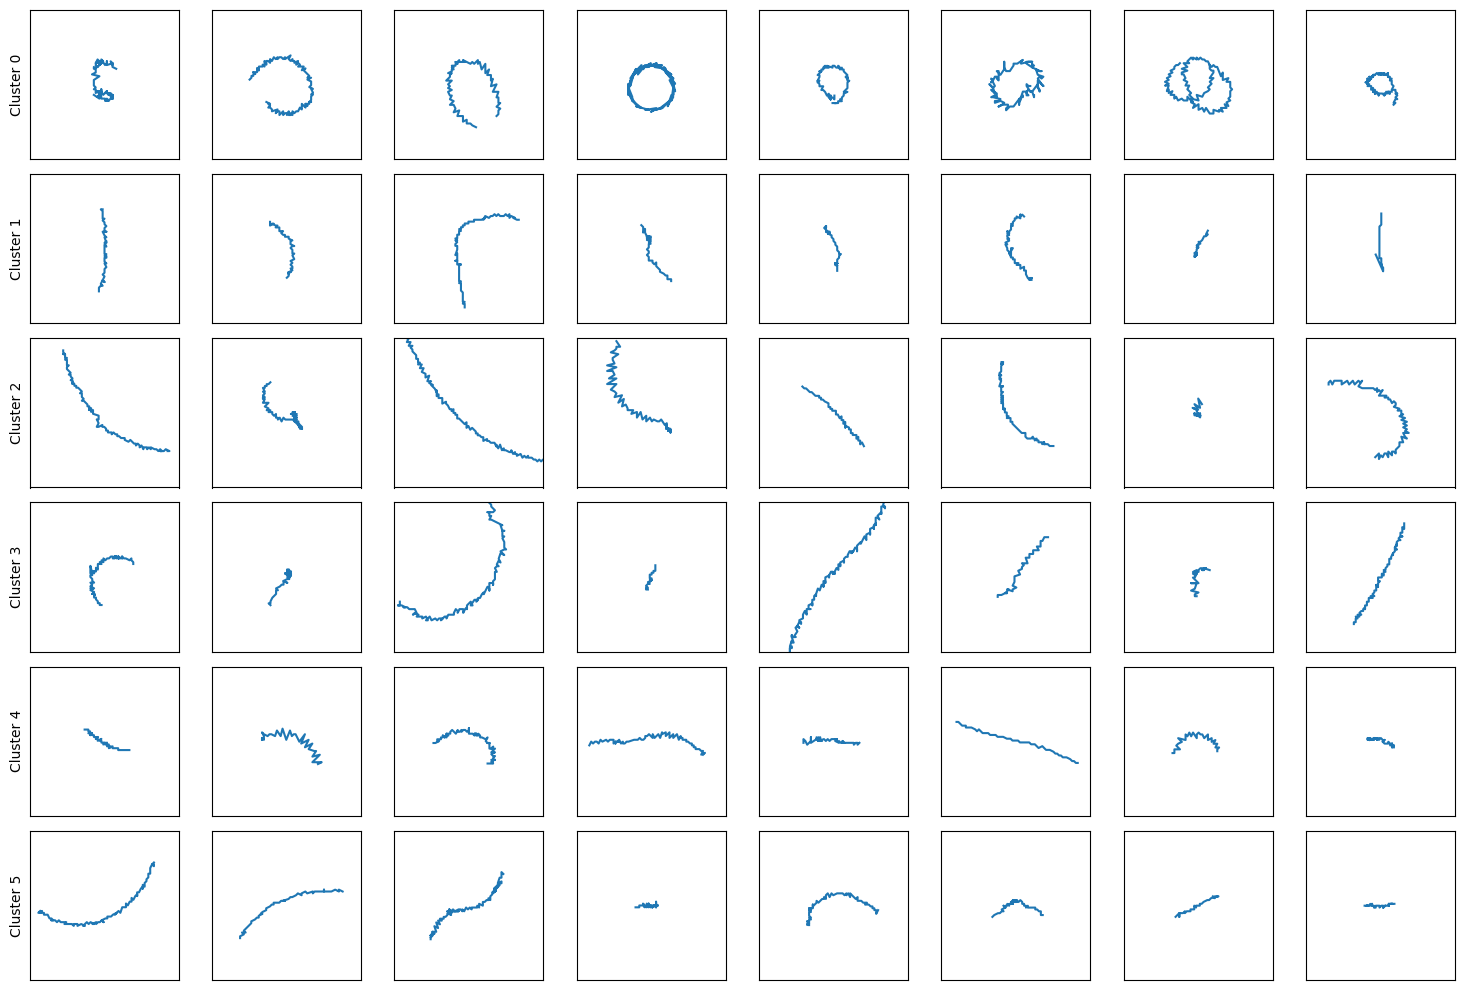

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

n_samples = 8
# Create a figure with subplots
fig, axes = plt.subplots(num_c, n_samples, figsize=(15, 10))  # Adjust the size as needed

for i in range(num_c):
    # Select random samples from each cluster
    cluster_data = df[df['SC_clusters'] == i].sample(n=n_samples, random_state=42)
    
    for j, (index, row) in enumerate(cluster_data.iterrows()):
        ax = axes[i][j]
        # Extract the centered trajectory
        traj_array = np.array(row['centered_traj'])
        # Plot the trajectory
        ax.plot(traj_array[:, 0], traj_array[:, 1])

        ax.set_xlim(-40, 40)
        ax.set_ylim(-40, 40)
        ax.set_aspect('equal', adjustable='box')

        # Optional: Hide x and y axis labels for clarity
        ax.set_xticks([])
        ax.set_yticks([])

    # Set y-axis label for each row
    axes[i][0].set_ylabel(f"Cluster {i}")

# Optional: adjust layout for better spacing
plt.tight_layout()
plt.show()
